# Sentiment Analysis

## Introduction

### Problem: 
Understanding the sentiment expressed in large volumes of textual data is a challenging task for businesses and organizations. Manual analysis of sentiments from customer reviews, social media comments, or other textual sources is time-consuming and prone to errors. Automating sentiment analysis can help extract valuable insights efficiently.

### Objective:
The objective of sentiment analysis is to develop automated methods that can accurately identify and classify the sentiment conveyed in text as positive, negative, or neutral. By analyzing sentiments, businesses can better understand customer opinions, monitor brand reputation, identify emerging trends, and make data-driven decisions to improve products, services, and marketing strategies.

### Importance:
Sentiment analysis aids businesses in understanding customer opinions, enhancing brand reputation, and making data-driven decisions, leading to improved products, services, and marketing strategies.

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Collection and Preprocessing

In [2]:
data = pd.read_csv(r"C:\Users\PHOENIX\OneDrive\Desktop\CSV Files\linkedin-reviews.csv")

In [3]:
data.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
data.dtypes

Review    object
Rating     int64
dtype: object

In [5]:
data.shape

(702, 2)

## Disribution of Ratings and Review Lengths

Text(0.5, 1.0, 'Distribution of ratings')

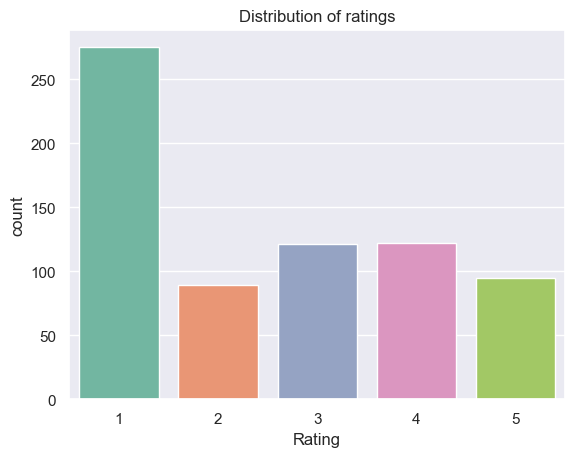

In [8]:
# Let’s begin with the distribution of ratings
sns.set(style="darkgrid")
sns.countplot(data=data,x="Rating",palette="Set2",hue="Rating",legend=False)
plt.title("Distribution of ratings")

Text(0.5, 1.0, 'Distribution of Review Lengths')

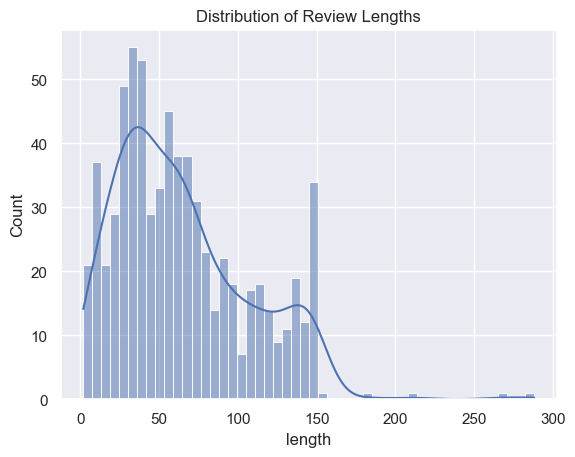

In [9]:
# calculate the length of each review and then visualize the data
data["length"] = data["Review"].apply(len)
sns.histplot(data["length"],bins=50,kde=True)
plt.title("Distribution of Review Lengths")

In [34]:
pip install textblob


     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     -- ---------------------------------- 41.0/636.8 kB 393.8 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/636.8 kB 804.6 kB/s eta 0:00:01
     ----------------- -------------------- 297.0/636.8 kB 1.5 MB/s eta 0:00:01
     ----------------------------------- -- 593.9/636.8 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     ------------ --------------------------- 0.5/1.5 MB 9.8 MB/s eta 0:00:01
     ----------------- ---------------------- 0.7/1.5 MB 6.9 MB/s eta 0:00:01
     --------------------------- ------------ 1.0/1.5 MB 7.3 MB/s eta 0:00:01
     --------------------------------- ------ 1.3/1.5 MB 7.4 MB/s eta 0:0

#### TextBlob is like a toolbox for understanding and working with text in Python. It helps you do things like figure out what words mean, whether a sentence is positive or negative, or even translate text from one language to another. It's handy for tasks like analyzing social media posts, identifying spam emails, or making language translation apps.

## TextBlob Sentiment Analysis Function

In [10]:
from textblob import TextBlob

In [11]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity >0.1:
        return "Positive"
    elif sentiment.polarity <-0.1:
        return "Negative"
    else:
        return "Neutral"
data["Sentiment"]=data["Review"].apply(textblob_sentiment_analysis)        

In [12]:
data.head()

,Review,Rating,length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


## Distribution of Sentiments

Text(0.5, 1.0, 'Distribution of Sentiments')

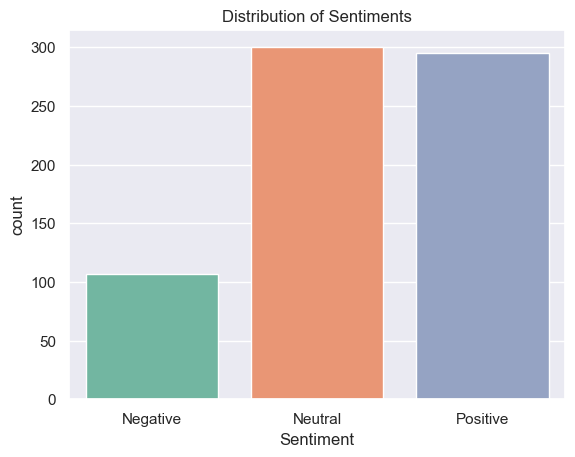

In [13]:
# Analyzing the distribution of sentiments
count=data["Sentiment"].value_counts()
sns.countplot(x=data["Sentiment"],palette="Set2",hue=data["Sentiment"])
plt.title("Distribution of Sentiments")

## Distribution of Sentiments Across Ratings

Text(0.5, 1.0, 'Sentiment Distribution Across Ratings')

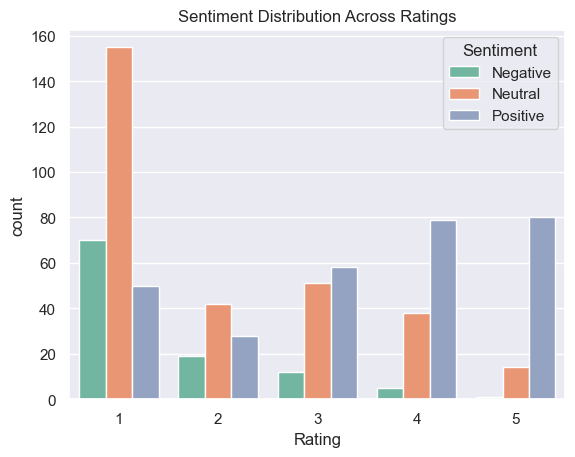

In [14]:
# we can see how sentiments are distributed across different rating levels
sns.countplot(data=data,x="Rating",hue="Sentiment",palette="Set2")
plt.title('Sentiment Distribution Across Ratings')

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### A word cloud is a visualization technique used to represent text data in which the size of each word indicates its frequency or importance within the text. In a word cloud, more frequently occurring words are typically displayed with larger font sizes, while less frequent words are smaller. 

## Wordcloud for Different Sentiments

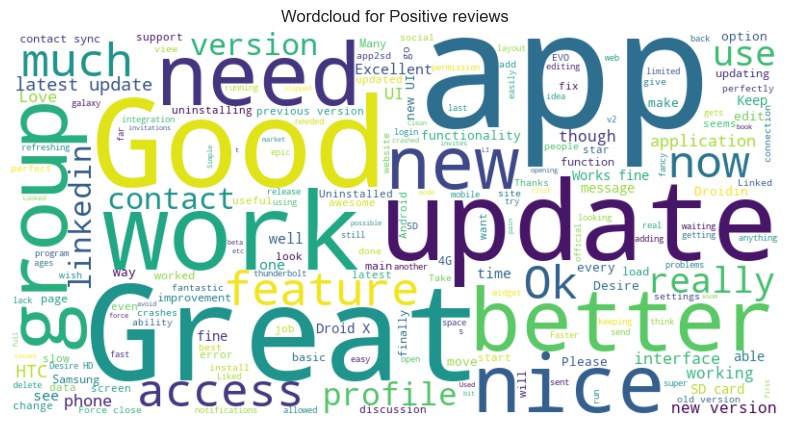

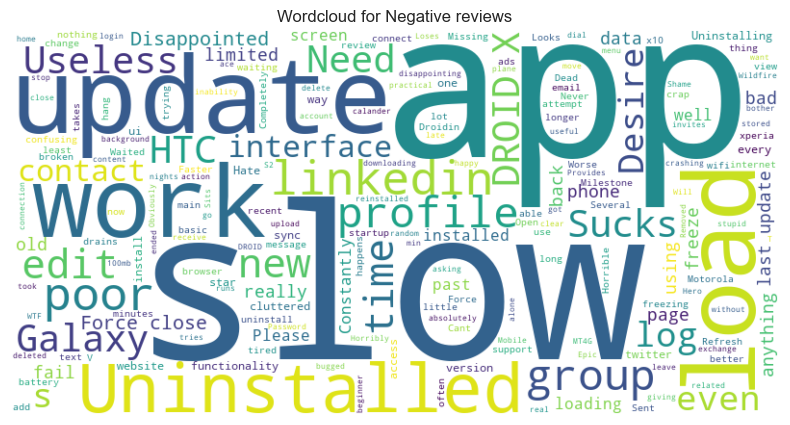

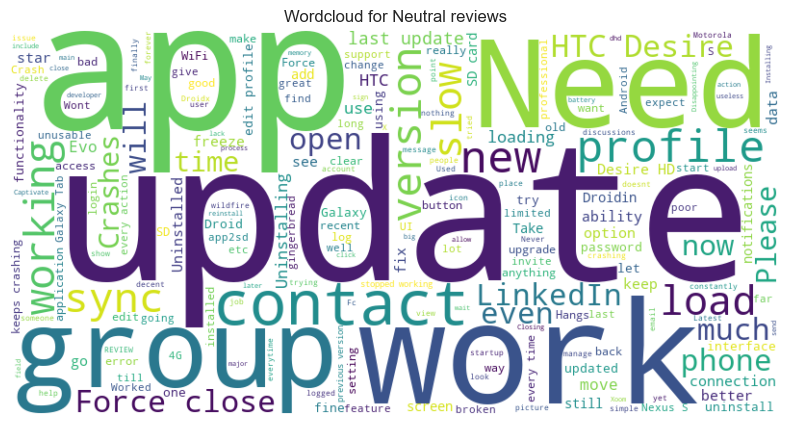

In [15]:
from wordcloud import WordCloud
def generate_wordcloud(sentiment):
    text=" ".join(review for review in data[data["Sentiment"]==sentiment]["Review"])
    wordcloud=WordCloud(width=800,height=400,background_color="White").generate(text)
    plt.figure(figsize=(12,5))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud for {sentiment} reviews")
    plt.show()
for sentiment in ["Positive","Negative","Neutral"]:
    generate_wordcloud(sentiment)
